### Import Libraries

In [1716]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics  # Just For Calculate R^2 Score... We Can even Delete all of the R^2 Score Codes

### Load Data

In [1084]:
data = np.load('data.npz')
x1_train = data['x1'] # 8000 x 1
x1_train = x1_train.reshape((8000,1))

x2_train = data['x2'] # 8000 x 1
x2_train = x2_train.reshape((8000,1))

x_train = np.reshape((np.concatenate((x1_train, x2_train), axis=0)),(2,-1)).T  # 8000 x 2 - # Concatenate 2 Features in Training Data


y_train = data['y']  # 8000 x 1
y_train = y_train.reshape((8000,1))

x1_test = data['x1_test']
x1_test = x1_test.reshape((2000,1))


x2_test = data['x2_test']
x2_test = x2_test.reshape((2000,1))

x_test = np.reshape((np.concatenate((x1_test, x2_test), axis=0)),(2,-1)).T  # 2000 x 2  - Concatenate 2 Features in Test Data

y_test = data['y_test'] # 2000 x 1
y_test = y_test.reshape((2000,1))


In [1085]:
def PolynomialFeatures( X, degree = 2) :
    X_train = X.copy()
    X_T=[]
    for ind in range(X_train.shape[0]):
        X = X_train[ind,:]
        indices = list( range( len( X ) ) )
        features = X.copy()
        prev_chunk = X
        for d in range( 1, degree ) :
            new_chunk = []
            i=0
            for v in X :
                next_index = len( new_chunk )
                for coef in prev_chunk[indices[i]:] :
                    new_chunk.append( v*coef )
                indices[i] = next_index
                i+=1
            features = np.append( features, new_chunk )
            prev_chunk = new_chunk

        features = np.insert( features, 0, 1 )
        X_T.append(list(features))

    return np.array(X_T)

#### SSE Loss Function

In [1086]:
def SSE(W, x, y):
    return np.sum(np.square(np.subtract(y,np.dot(x,W))))
    

#### Gradient Descent


In [1005]:
def GradientDescent(W, x, y , Iteration, LR=1e-12,threshold=1e+6):
    xtranspose = x.T
    Cost_Hist=[1]
    for i in range(Iteration):
        Cost_Hist.append(SSE(W,x, y))
        diff=abs(Cost_Hist[-2]- Cost_Hist[-1])
        if diff<threshold:
            break
        W = np.add(W, LR *(np.dot(xtranspose,(y-np.dot(x,W))) ))
    return W,Cost_Hist[1:]

#### Closed Form

In [1098]:
def Closed_Form(X,Y):
  #W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
    return W

#### Regression (for each n such as 1, 3 and 5)

In [1019]:
def Regression(n=1,*,X,Y,threshold=1e-20,LR=1e-8,iteration=1000,method="Gradient"):
    X_train = PolynomialFeatures(X,n)
    W = np.random.rand(X_train.shape[1],1)
    if method == "Gradient":
        W = GradientDescent(W,X_train,Y,Iteration=iteration,LR=LR,threshold=threshold)
    elif method == "Close":
        W = Closed_Form(X_train,Y)
    else:
        W=[0]
    
    return W

# _________________________________________________________________________________________________________________

#### Linear Regression ( Closed Form )

Cost Value on Test Data :  12944759955.77201  , R^2 Accuracy =  0.7433139839030176
Cost Value on Training Data :  18317759690.36797  , R^2 Accuracy =  0.7945974867000264


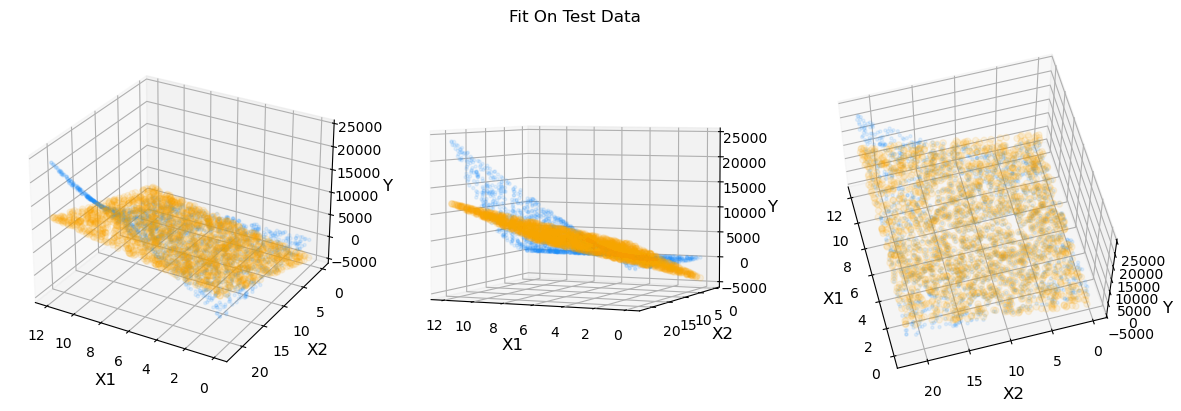

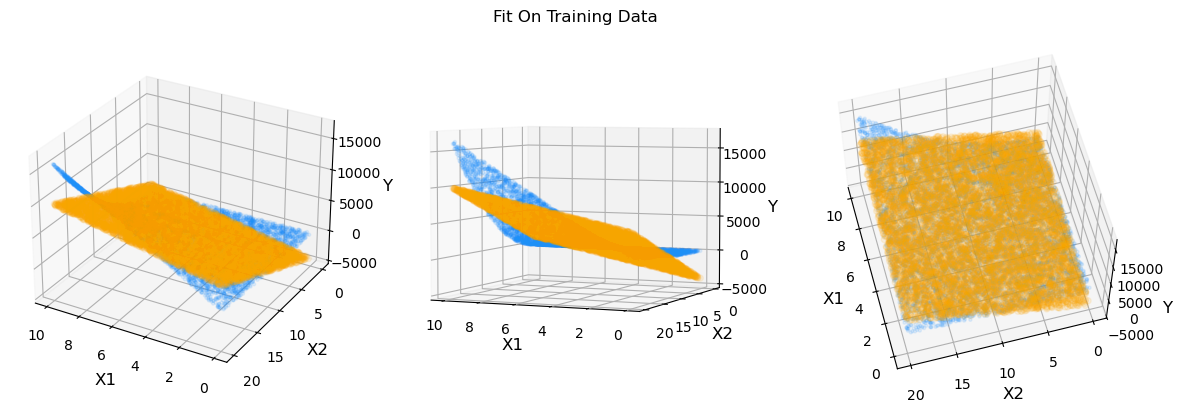

In [1020]:
Regre = Regression(1,X=x_train,Y=y_train,threshold=1e+2,LR=1e-7,iteration=3000,method="Close")       
W = Regre


# Plot Regression
X_test = PolynomialFeatures(x_test,1)
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
fig.suptitle('Fit On Test Data')
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_test, x2_test, y_test, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_test, x2_test, np.dot(X_test,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Test Data : ",SSE(W,X_test,y_test)," , R^2 Accuracy = ",metrics.r2_score(y_test, np.dot(X_test,W)))

# Plot on Training Data
X_train = PolynomialFeatures(x_train,1)
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Training Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_train, x2_train, y_train, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_train, x2_train, np.dot(X_train,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Training Data : ",SSE(W,X_train,y_train)," , R^2 Accuracy = ",metrics.r2_score(y_train, np.dot(X_train,W)))

همینطور که مشاهده میشود دقت 74 درصد در داده های تست و 79 درصد در داده های آموزشی حاصل شده است. تقریبا دقت قابل قبولی است به نسبت خطی بودن مدل.


<h3 style="text-align:center;">نمودار روی داده تست</h3>
<img src="Linear Regression - Closed Form .gif" width=600 height=600 />
<h4 style="text-align:right;">کاملا نتیجه قابل مشاهده است - نارنجی = هایپر پلین مربوط به تابع تخمین و آبی هایپر پلین داده های آموزشی</h4>


#### Linear Regression ( Gradient Descent )

Cost Value on Test Data :  15894720003.55463  , R^2 Accuracy =  0.6848182300305833
Cost Value on Training Data :  20527575718.899216  , R^2 Accuracy =  0.7698181592132944


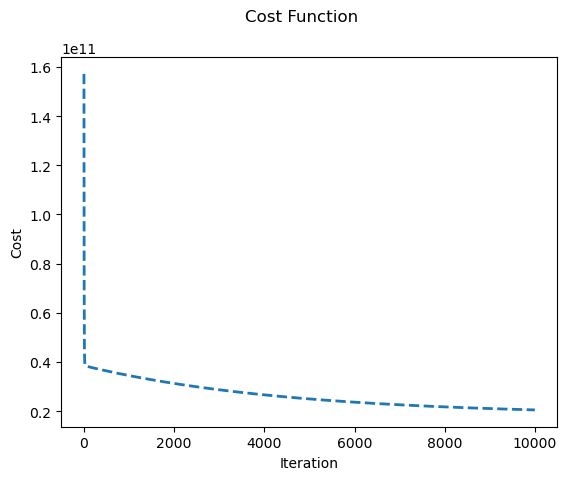

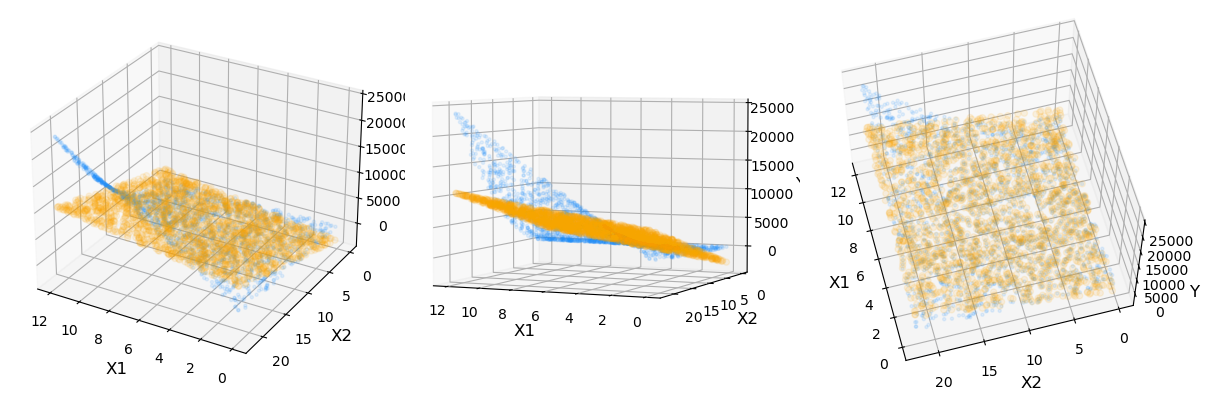

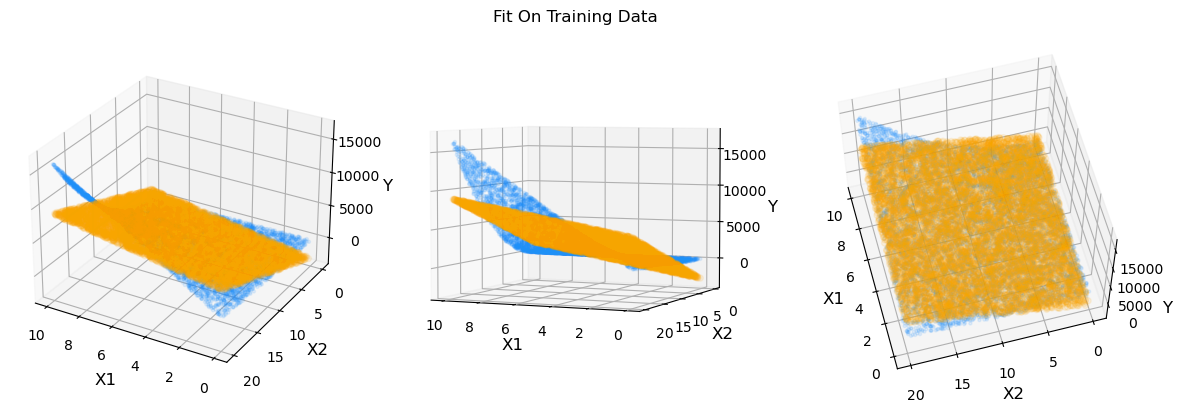

In [963]:
Regre = Regression(1,X=x_train,Y=y_train,threshold=1e+2,LR=1e-7,iteration=10000,method="Gradient")       
W = Regre[0]
# Plot Cost
JHist = Regre[1]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.suptitle('Error Function')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.plot(JHist)



# Plot Regression
X_test = PolynomialFeatures(x_test,1)
plt.style.use('default')
fig.suptitle('Fit On Test Data')
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_test, x2_test, y_test, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_test, x2_test, np.dot(X_test,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Test Data : ",SSE(W,X_test,y_test)," , R^2 Accuracy = ",metrics.r2_score(y_test, np.dot(X_test,W)))

# Plot on Training Data
X_train = PolynomialFeatures(x_train,1)
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Training Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_train, x2_train, y_train, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_train, x2_train, np.dot(X_train,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Training Data : ",SSE(W,X_train,y_train)," , R^2 Accuracy = ",metrics.r2_score(y_train, np.dot(X_train,W)))



با استفاده از گرادیان نزولی نیز دقت خوبی گرفته ایم . روی داده های تست 69 درصد و روی داده های آموزشی 75 درصد. این درصد ها با بالا بردن تعداد تکرار ها بهبود می یابد.

<h3 style="text-align:center;">نمودار روی داده تست</h3>
<img src="Linear Regression - Gradient Descent.gif" width=600 height=600 />

## Polynomial Regression ( n = 3 )

#### Close Form

Error Value on Test Data :  5.309413410151504e-15  , R^2 Accuracy =  1.0
Error Value on Training Data :  1.2964142061661707e-14  , R^2 Accuracy =  1.0


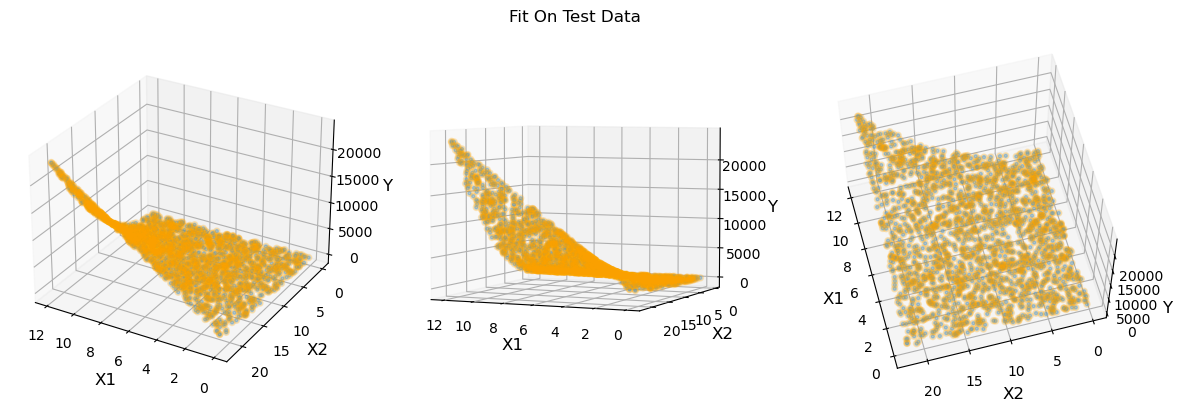

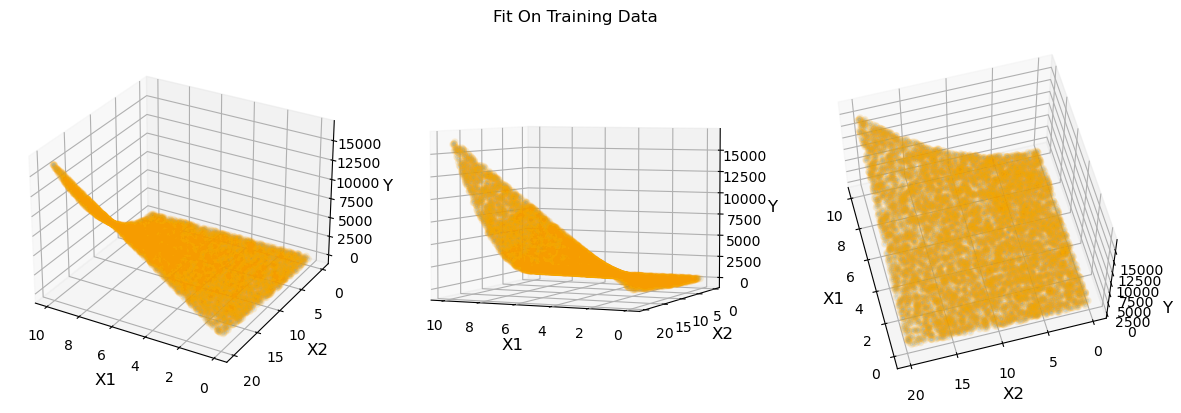

In [1103]:
W = Regression(3,X=x_train,Y=y_train,threshold=1e+2,LR=1e-7,iteration=3000,method="Close")       

# Plot Regression
X_test = PolynomialFeatures(x_test,3)
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Test Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_test, x2_test, y_test, label ='y',
                s = 5, color ="dodgerblue", alpha=0.4)
 
    ax.scatter(x1_test, x2_test, np.dot(X_test,W),
                    label ='regression', color ="orange", alpha=0.2)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Test Data : ",SSE(W,X_test,y_test)," , R^2 Accuracy = ",metrics.r2_score(y_test, np.dot(X_test,W)))

# Plot on Training Data
X_train = PolynomialFeatures(x_train,3)
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Training Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_train, x2_train, y_train, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_train, x2_train, np.dot(X_train,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Training Data : ",SSE(W,X_train,y_train)," , R^2 Accuracy = ",metrics.r2_score(y_train, np.dot(X_train,W)))


<h3 style="text-align:center;">نمودار روی داده تست</h3>
<img src="n3 Regression - Closed.gif" width=600 height=600 />

فوق العاده !!! دقت 100 درصد روی داده های تست و آموزشی با روش فرمول بسته . مدل درجه سه به خوبی تخمین میزند.

#### Gradient Descent

Cost Value on Test Data :  3966555.3221134352  , R^2 Accuracy =  0.9999213458351688
Cost Value on Training Data :  6293647.008267477  , R^2 Accuracy =  0.9999294274553672


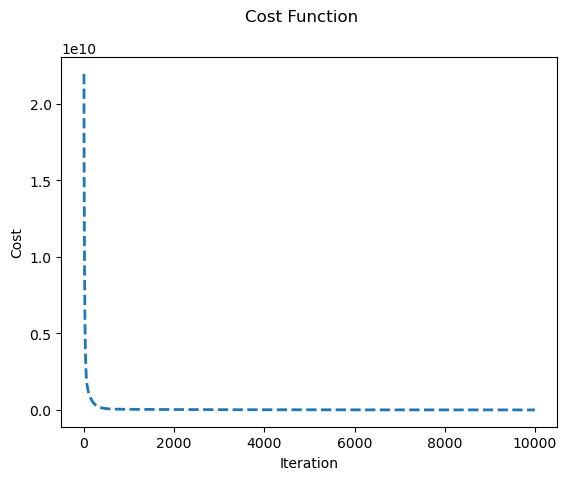

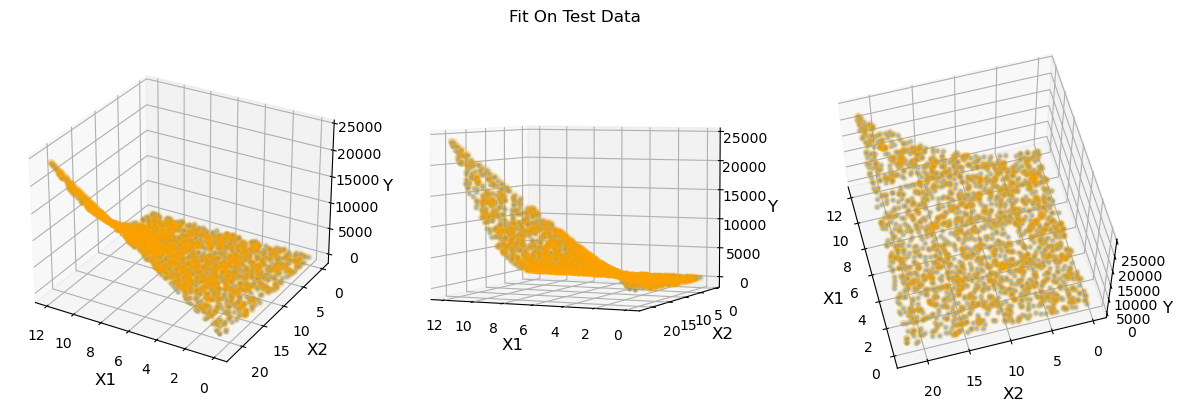

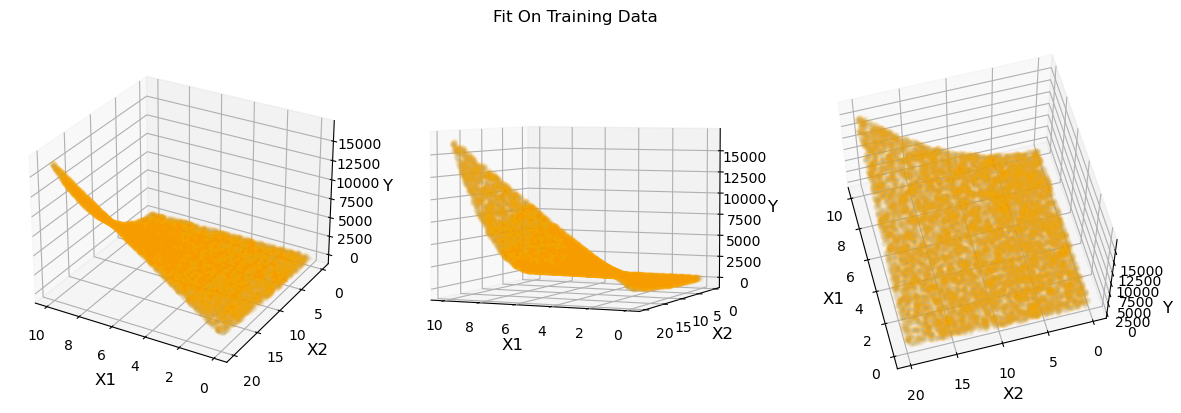

In [1031]:
Regre = Regression(3,X=x_train,Y=y_train,threshold=1e+1,LR=1e-11,iteration=10000,method="Gradient")       
W = Regre[0]
# Plot Cost
JHist = Regre[1]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.suptitle('Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.plot(JHist)


# Plot On Test Data
X_test = PolynomialFeatures(x_test,3)
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Test Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_test, x2_test, y_test, label ='y',
                s = 5, color ="dodgerblue", alpha=0.4)
 
    ax.scatter(x1_test, x2_test, np.dot(X_test,W),
                    label ='regression', color ="orange", alpha=0.2)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Test Data : ",SSE(W,X_test,y_test)," , R^2 Accuracy = ",metrics.r2_score(y_test, np.dot(X_test,W)))


# Plot on Training Data
X_train = PolynomialFeatures(x_train,3)
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Training Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_train, x2_train, y_train, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_train, x2_train, np.dot(X_train,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Training Data : ",SSE(W,X_train,y_train)," , R^2 Accuracy = ",metrics.r2_score(y_train, np.dot(X_train,W)))



<h3 style="text-align:center;">نمودار روی داده تست</h3>
<img src="n3 Regression - Gradient.gif" width=600 height=600 />

دقت خیلی خیلی خوب 99.99999 !!! با مدل درجه 3 و گرادیان نزولی بسیار نتیجه خوبی گرفتیم . نشان میدهد که داده های ما از درجه 3 هستند. هم روی داده های تست خوب جواب میدهد هم روی داده های آموزشی

## Polynomial Regression ( n = 5 )

#### Close Form

Error Value on Test Data :  4.6080138743303176e-09  , R^2 Accuracy =  1.0
Error Value on Training Data :  1.4143615044454649e-08  , R^2 Accuracy =  1.0


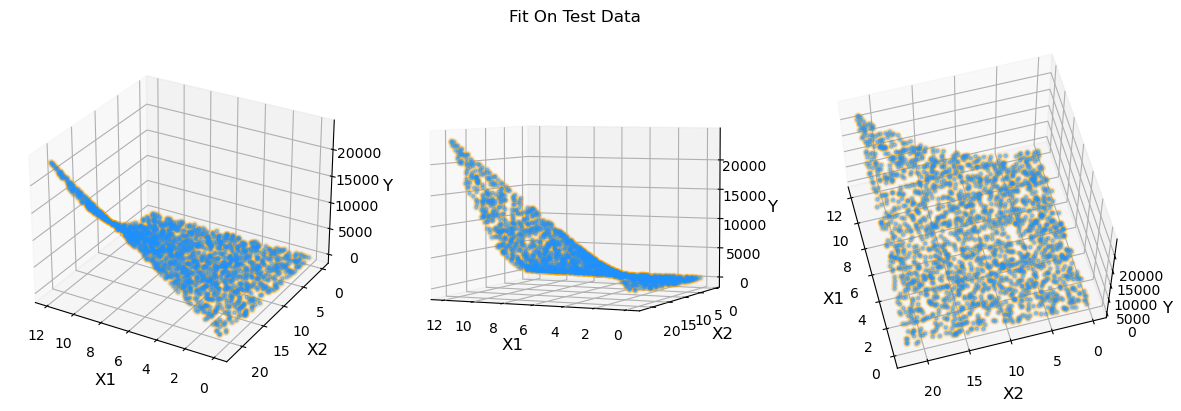

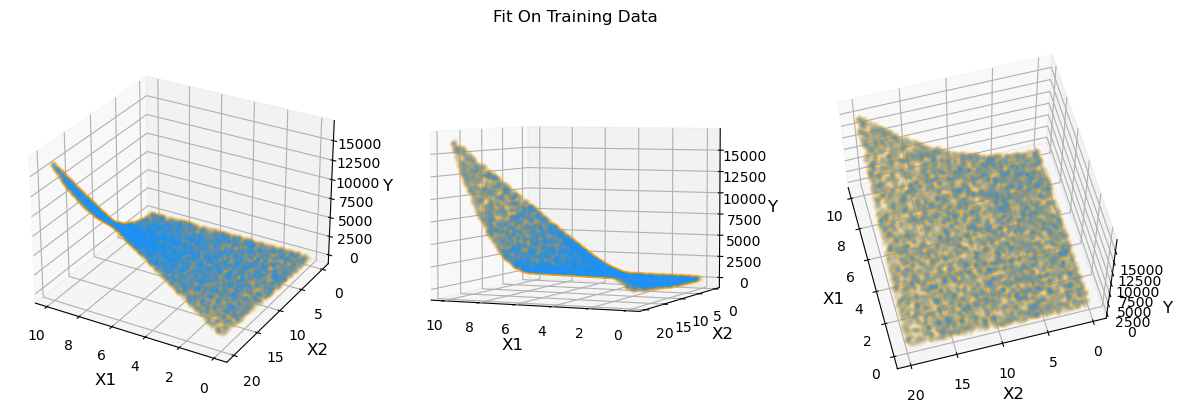

In [1102]:
n=5
W = Regression(n,X=x_train,Y=y_train,method="Close")       

# Plot Regression
X_test = PolynomialFeatures(x_test,n)
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Test Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_test, x2_test, y_test, label ='y',
                s = 5, color ="dodgerblue", alpha=0.4)
 
    ax.scatter(x1_test, x2_test, np.dot(X_test,W),
                    label ='regression', color ="orange", alpha=0.2)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Test Data : ",SSE(W,X_test,y_test)," , R^2 Accuracy = ",metrics.r2_score(y_test, np.dot(X_test,W)))

# Plot on Training Data
X_train = PolynomialFeatures(x_train,n)
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Training Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_train, x2_train, y_train, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_train, x2_train, np.dot(X_train,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Training Data : ",SSE(W,X_train,y_train)," , R^2 Accuracy = ",metrics.r2_score(y_train, np.dot(X_train,W)))


<h3 style="text-align:center;">نمودار روی داده تست</h3>
<img src="n5 Regression - Closed.gif" width=600 height=600 />

#### Gradient Descent

Error Value on Test Data :  87733544217.29219  , R^2 Accuracy =  -0.7396980724361457
Error Value on Training Data :  50268191536.99261  , R^2 Accuracy =  0.4363277466636898


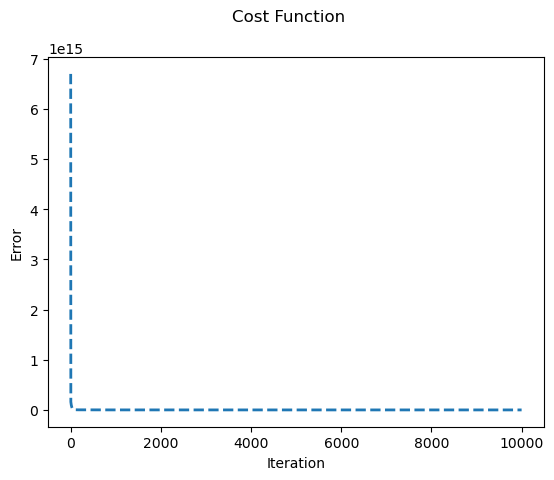

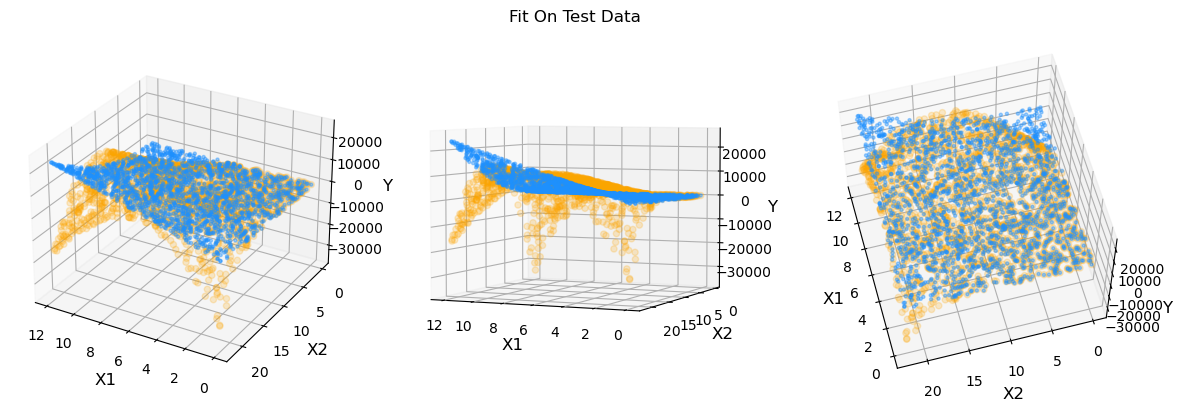

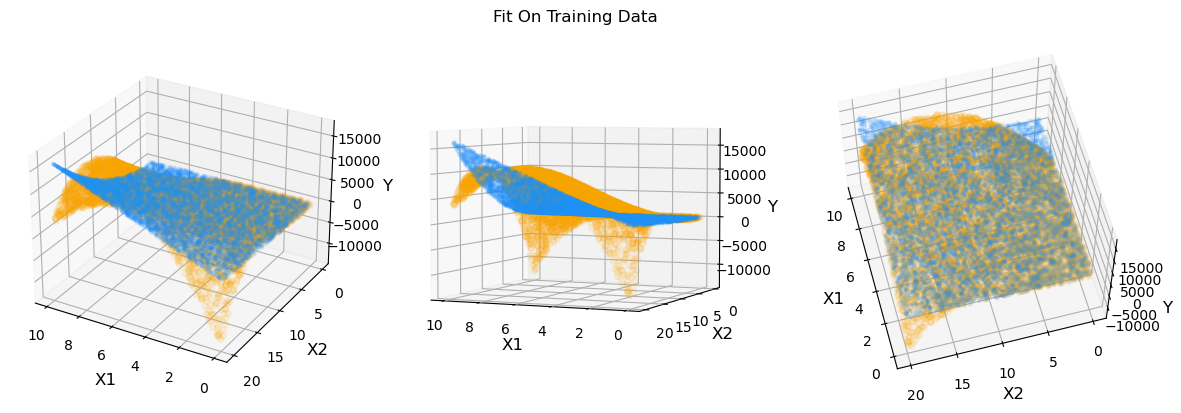

In [1120]:
Regre = Regression(5,X=x_train,Y=y_train,threshold=1e+2,LR=1e-16,iteration=10000,method="Gradient")       
W = Regre[0]
# Plot Cost
JHist = Regre[1]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.suptitle('Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.plot(JHist)

# Plot On Test Data
X_test = PolynomialFeatures(x_test,5)
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Test Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_test, x2_test, y_test, label ='y',
                s = 5, color ="dodgerblue", alpha=0.4)
 
    ax.scatter(x1_test, x2_test, np.dot(X_test,W),
                    label ='regression', color ="orange", alpha=0.2)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Test Data : ",SSE(W,X_test,y_test)," , R^2 Accuracy = ",metrics.r2_score(y_test, np.dot(X_test,W)))


# Plot on Training Data
X_train = PolynomialFeatures(x_train,5)
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Fit On Training Data')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(x1_train, x2_train, y_train, label ='y',
                s = 5, color ="dodgerblue", alpha=0.1)
 
    ax.scatter(x1_train, x2_train, np.dot(X_train,W),
                    label ='regression', color ="orange", alpha=0.1)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()
print("Error Value on Training Data : ",SSE(W,X_train,y_train)," , R^2 Accuracy = ",metrics.r2_score(y_train, np.dot(X_train,W)))




#### .علت دقت پایین در اینجا، سخت بودن انتخاب لرنینگ ریت ( به دلیل کوچک بودن ) و تکرار زیاد مورد نیاز است. هر چه تکرار بیشتر باشد دقت بیشتری حاصل میشود
#### 3000 تکرار برای این لرنینگ ریت کم است

<h3 style="text-align:center;">نمودار روی داده آموزشی</h3>
<img src="n5 Regression - Gradient - Training.gif" width=600 height=600 />

<h3 style="text-align:center;">نمودار روی داده تست</h3>
<img src="n5 Regression - Gradient - Test.gif" width=600 height=600 />


## Part 3

### Regularization - SSERegularized - K Cross Validation

In [1536]:
def SSERegularized(W, x, y , Lambda):
    return np.sum(np.square(np.subtract(y,np.dot(x,W)))) + (Lambda*(np.dot(W.T,W)))[0][0]

In [1600]:
def KCrossValidation(X,Y,k=5):
    N = X.shape[0]
    step = int(N/k)
    now = 0
    for i in range(k):
        if i== k-1 :
            Validation_X = X[now:,:]
            Validation_Y = Y[now:,:]
            X_New = X[0:now,:]
            Y_New = Y[0:now,:]
            
        else :
            Validation_X =  X[now:now+step,:]
            Validation_Y = Y[now:now+step,:]
            X_New = np.append(X[0:now,:],X[now+step:,:],axis=0)
            Y_New = np.append(Y[0:now,:],Y[now+step:,:],axis=0)
        now+=step
        yield X_New, Y_New, Validation_X, Validation_Y

In [1601]:
def ShuffleDataset(a, b):   # For generate shuffle from Dataset
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [1633]:
def RegressionRegularization(n=1,*,X,Y,X_test,Y_test,Lambda,k=5):
    LossTrainHist = []
    LossValidationHist = []
    LossTest = []
    X_train = PolynomialFeatures(X,n)
    X_test = PolynomialFeatures(X_test,n)
    X_train, Y = ShuffleDataset(X_train,Y)
    for item in KCrossValidation(X_train,Y,k):
        X_Train = item[0]
        X_validation = item[2]
        Y_Train = item[1]
        Y_validaiton = item[3]
        LambdaI = Lambda * np.eye(X_Train.shape[1])
        W = np.dot(np.linalg.pinv((np.dot(X_Train.T,X_Train))+LambdaI),np.dot(X_Train.T,Y_Train))
        LossTrainHist.append(SSE(W,X_Train,Y_Train))
        LossValidationHist.append(SSE(W,X_validation,Y_validaiton))
        LossTest.append(SSE(W,X_test,Y_test))
        
    return sum(LossTrainHist)/k , sum(LossValidationHist)/k , sum(LossTest)/k

#### Test lambda for linear regression

Loss for 0.0001 - Validation Set :  3664712996.9535685
Loss for 0.0001 - Test Set :  12944842509.298565
Loss for 0.0001 - Train Set  :  14653690908.159801


Loss for 0.001 - Validation Set :  3667337433.331006
Loss for 0.001 - Test Set :  12945553186.150864
Loss for 0.001 - Train Set  :  14652524730.148945


Loss for 0.01 - Validation Set :  3669159356.5488153
Loss for 0.01 - Test Set :  12946030830.56185
Loss for 0.01 - Train Set  :  14651713315.804651


Loss for 0.1 - Validation Set :  3664900042.187786
Loss for 0.1 - Test Set :  12945741175.141142
Loss for 0.1 - Train Set  :  14653609496.513819


Loss for 1 - Validation Set :  3670045186.0833144
Loss for 1 - Test Set :  12954222417.487278
Loss for 1 - Train Set  :  14651342166.400768


Loss for 10.0 - Validation Set :  3674531606.7526603
Loss for 10.0 - Test Set :  13025910694.85733
Loss for 10.0 - Train Set  :  14651564159.730839


Loss for 100.0 - Validation Set :  3708919396.0931807
Loss for 100.0 - Test Set :  13712093110.3612
L

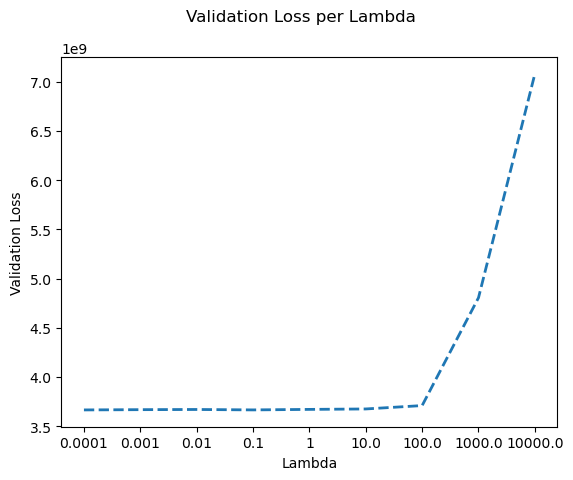

In [1712]:
n=1
RegularList = [ 1e-4, 1e-3, 1e-2 , 1e-1 , 1 , 1e+1 , 1e+2 , 1e+3 , 1e+4]
BestIndex = 0
LossValidationHist=[]
for RegPar in enumerate(RegularList):
    LossTrain, LossValidation, LossTest  = RegressionRegularization(n,X=x_train,Y=y_train,X_test=x_test,Y_test=y_test,Lambda=RegPar[1],k=5)
    LossValidationHist.append(LossValidation)
    if RegPar[0]== 0:
        BestLosValid = LossValidation
    else:
        if BestLosValid > LossValidation:
            BestLosValid = LossValidation
            BestIndex = RegPar[0]
    print(f"Loss for {RegPar[1]} - Validation Set : ", LossValidation)
    print(f"Loss for {RegPar[1]} - Test Set : ", LossTest)
    print(f"Loss for {RegPar[1]} - Train Set  : ", LossTrain)
    print("\n")

print("Best Lambda: ",RegularList[BestIndex])
# Plot Cost
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.suptitle('Validation Loss per Lambda')
plt.xlabel('Lambda')
plt.ylabel('Validation Loss')
RegularListStr = [str(s) for s in RegularList]
plt.plot(RegularListStr,LossValidationHist)


#### Test Lambda for n=3 

Loss for 0.0001 - Validation Set :  3.3355946624229666e-11
Loss for 0.0001 - Test Set :  2.3503083044506126e-10
Loss for 0.0001 - Train Set  :  1.3237659203948535e-10


Loss for 0.001 - Validation Set :  3.270135398443331e-09
Loss for 0.001 - Test Set :  2.2492195765213363e-08
Loss for 0.001 - Train Set  :  1.3028423226684137e-08


Loss for 0.01 - Validation Set :  3.267194772327817e-07
Loss for 0.01 - Test Set :  2.2539188831204156e-06
Loss for 0.01 - Train Set  :  1.3032107672571468e-06


Loss for 0.1 - Validation Set :  3.26264365823256e-05
Loss for 0.1 - Test Set :  0.00022503169262064237
Loss for 0.1 - Train Set  :  0.00013024566210417606


Loss for 1 - Validation Set :  0.003259234942713658
Loss for 1 - Test Set :  0.022427131738769153
Loss for 1 - Train Set  :  0.01298378634185933


Loss for 10.0 - Validation Set :  0.3153480585715725
Loss for 10.0 - Test Set :  2.139338724556422
Loss for 10.0 - Train Set  :  1.257292926759586


Loss for 100.0 - Validation Set :  24.229412319768

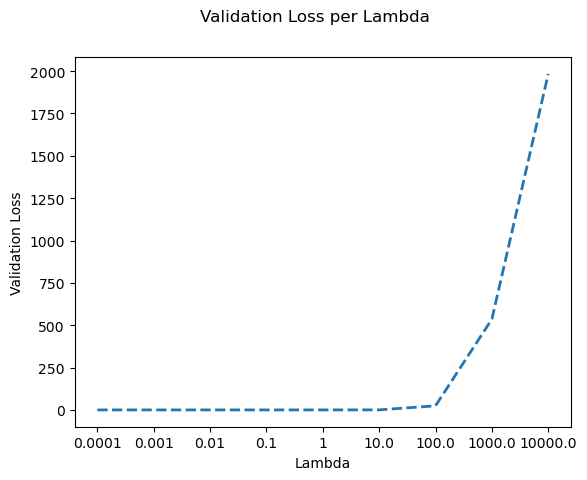

In [1713]:
n=3
RegularList = [ 1e-4, 1e-3, 1e-2 , 1e-1 , 1 , 1e+1 , 1e+2 , 1e+3 , 1e+4]
BestIndex = 0
LossValidationHist=[]
for RegPar in enumerate(RegularList):
    LossTrain, LossValidation, LossTest  = RegressionRegularization(n,X=x_train,Y=y_train,X_test=x_test,Y_test=y_test,Lambda=RegPar[1],k=5)
    LossValidationHist.append(LossValidation)
    if RegPar[0]== 0:
        BestLosValid = LossValidation
    else:
        if BestLosValid > LossValidation:
            BestLosValid = LossValidation
            BestIndex = RegPar[0]
    print(f"Loss for {RegPar[1]} - Validation Set : ", LossValidation)
    print(f"Loss for {RegPar[1]} - Test Set : ", LossTest)
    print(f"Loss for {RegPar[1]} - Train Set  : ", LossTrain)
    print("\n")

print("Best Lambda: ",RegularList[BestIndex])

# Plot Cost
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.suptitle('Validation Loss per Lambda')
plt.xlabel('Lambda')
plt.ylabel('Validation Loss')
RegularListStr = [str(s) for s in RegularList]
plt.plot(RegularListStr,LossValidationHist)


#### Test Lambda for n=5

Loss for 0.0001 - Validation Set :  1.242808219331228e-06
Loss for 0.0001 - Test Set :  9.433212176708398e-05
Loss for 0.0001 - Train Set  :  5.593216856491921e-06


Loss for 0.001 - Validation Set :  8.75141992146256e-06
Loss for 0.001 - Test Set :  0.0006179740946786651
Loss for 0.001 - Train Set  :  2.9626523895940733e-05


Loss for 0.01 - Validation Set :  2.018890694888875e-05
Loss for 0.01 - Test Set :  0.0019423524371133514
Loss for 0.01 - Train Set  :  8.304701361479681e-05


Loss for 0.1 - Validation Set :  0.0008897509758241957
Loss for 0.1 - Test Set :  0.08481845881436342
Loss for 0.1 - Train Set  :  0.0035671963103295415


Loss for 1 - Validation Set :  0.08099241571044247
Loss for 1 - Test Set :  7.50021608987755
Loss for 1 - Train Set  :  0.3191837477145267


Loss for 10.0 - Validation Set :  3.34201179402962
Loss for 10.0 - Test Set :  261.0436204006217
Loss for 10.0 - Train Set  :  13.219101211736453


Loss for 100.0 - Validation Set :  34.822413948449466
Loss for 100.

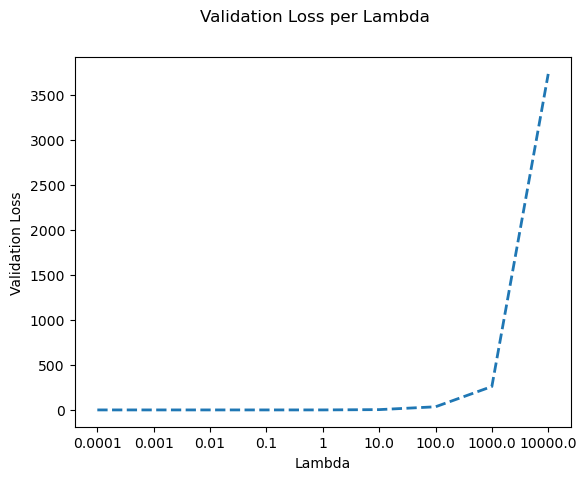

In [1714]:
n=5
RegularList = [ 1e-4, 1e-3, 1e-2 , 1e-1 , 1 , 1e+1 , 1e+2 , 1e+3 , 1e+4]
BestIndex = 0
LossValidationHist=[]
for RegPar in enumerate(RegularList):
    LossTrain, LossValidation, LossTest  = RegressionRegularization(n,X=x_train,Y=y_train,X_test=x_test,Y_test=y_test,Lambda=RegPar[1],k=5)
    LossValidationHist.append(LossValidation)
    if RegPar[0]== 0:
        BestLosValid = LossValidation
    else:
        if BestLosValid > LossValidation:
            BestLosValid = LossValidation
            BestIndex = RegPar[0]
    print(f"Loss for {RegPar[1]} - Validation Set : ", LossValidation)
    print(f"Loss for {RegPar[1]} - Test Set : ", LossTest)
    print(f"Loss for {RegPar[1]} - Train Set  : ", LossTrain)
    print("\n")

print("Best Lambda: ",RegularList[BestIndex])
# Plot Cost
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.suptitle('Validation Loss per Lambda')
plt.xlabel('Lambda')
plt.ylabel('Validation Loss')
RegularListStr = [str(s) for s in RegularList]
plt.plot(RegularListStr,LossValidationHist)

#### Test Lambda for n=20 (Extra)

Loss for 0.0001 - Validation Set :  4681183754.559215
Loss for 0.0001 - Test Set :  14383712699997.777
Loss for 0.0001 - Train Set  :  18523607961.541092


Loss for 0.001 - Validation Set :  4686423436.564216
Loss for 0.001 - Test Set :  14475848270112.287
Loss for 0.001 - Train Set  :  18523184450.769043


Loss for 0.01 - Validation Set :  4667733987.268164
Loss for 0.01 - Test Set :  14322705719186.887
Loss for 0.01 - Train Set  :  18531157392.250935


Loss for 0.1 - Validation Set :  4674294433.2353
Loss for 0.1 - Test Set :  14472266667080.24
Loss for 0.1 - Train Set  :  18531038611.803658


Loss for 1 - Validation Set :  4684587143.792647
Loss for 1 - Test Set :  14395849390120.207
Loss for 1 - Train Set  :  18523056151.32168


Loss for 10.0 - Validation Set :  4685063012.640806
Loss for 10.0 - Test Set :  14360830773172.34
Loss for 10.0 - Train Set  :  18521401268.74809


Loss for 100.0 - Validation Set :  4684579435.221751
Loss for 100.0 - Test Set :  14522312024691.535
Loss for

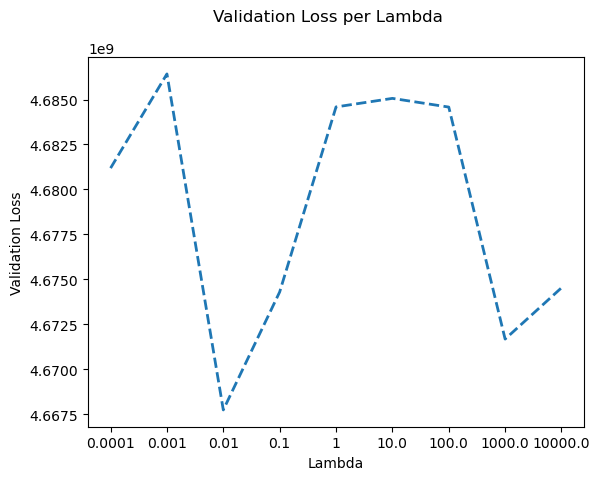

In [1699]:
n=20
RegularList = [ 1e-4, 1e-3, 1e-2 , 1e-1 , 1 , 1e+1 , 1e+2 , 1e+3 , 1e+4]
BestIndex = 0
LossValidationHist=[]
for RegPar in enumerate(RegularList):
    LossTrain, LossValidation, LossTest  = RegressionRegularization(n,X=x_train,Y=y_train,X_test=x_test,Y_test=y_test,Lambda=RegPar[1],k=5)
    LossValidationHist.append(LossValidation)
    if RegPar[0]== 0:
        BestLosValid = LossValidation
    else:
        if BestLosValid > LossValidation:
            BestLosValid = LossValidation
            BestIndex = RegPar[0]
    print(f"Loss for {RegPar[1]} - Validation Set : ", LossValidation)
    print(f"Loss for {RegPar[1]} - Test Set : ", LossTest)
    print(f"Loss for {RegPar[1]} - Train Set  : ", LossTrain)
    print("\n")

print("Best Lambda: ",RegularList[BestIndex])
# Plot Cost
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.suptitle('Validation Loss per Lambda')
plt.xlabel('Lambda')
plt.ylabel('Validation Loss')
RegularListStr = [str(s) for s in RegularList]
plt.plot(RegularListStr,LossValidationHist)

# END